In [882]:
import numpy as np
import pandas as pd
import re

from urllib.request import urlopen
from bs4 import BeautifulSoup, Comment


In [2]:
# url that we are scraping
url = "http://www.basketball-reference.com/players/d/duncati01.html"

# this is the html from the given url
html = urlopen(url)
soup = BeautifulSoup(html,'lxml')

/Users/rcroke/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /Users/rcroke/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
column_headers = [th.getText() for th in 
                  soup.findAll('tr', limit=2)[0].findAll('th')]
column_headers

In [246]:
def get_player_df():
    player_df1 = create_player_dataframe()
    
    #for player in player_df1['BR_player_id']:
    #    player_df1 = _get_player_meta_data(player_df1.copy(),player)
        
    return player_df1

def create_player_dataframe():
    '''
    method for creating all player's in BR player index,
    https://www.basketball-reference.com/players/a/ e.g.
    '''
    
    from string import ascii_lowercase

    # make pandas dataframe for all player info
    player_df = pd.DataFrame(columns=["Player","BR_player_id","From","To",
                                      "Pos","Ht","Wt","Birth Date","College",
                                      "active","shoots","draft_team","pick_order",
                                      "draft_year_type"])

    j = 0
    for letter in ascii_lowercase:

        if letter == "x":
            continue

        url = "http://www.basketball-reference.com/players/"+str(letter)+"/"
        html = urlopen(url)
        soup = BeautifulSoup(html,'lxml')
        player_table = soup.select("#players")

        for i,row in enumerate(player_table[0].find_all("tr")):

            player_info = []

            # skip metadata
            if i == 0:
                continue

            player_info.append(row.find_all("th")[0].text)
            BR_player_id = row.find_all("th")[0]['data-append-csv']
            player_info.append(BR_player_id)

            for row2 in row.find_all("td"):
                player_info.append(row2.text)

            if "<strong>" in str(row.find_all("th")[0]):
                player_info.append(int(1))
            else:
                player_info.append(int(0))
            
            cols_to_fill = ["Player","BR_player_id","From","To",
                            "Pos","Ht","Wt","Birth Date","College",
                            "active"]

            player_df.loc[j,cols_to_fill] = player_info
            player_df = _get_player_meta_data(player_df,letter,BR_player_id)
            
            j+=1
    
            

    return player_df

def _get_player_meta_data(df,letter,BR_player_id):
    temp_player_df = df.copy()
    BR_player_id = BR_player_id
    player_index = temp_player_df[temp_player_df['BR_player_id'] == BR_player_id].index[0]
    
    url = "https://www.basketball-reference.com/players/"+str(BR_player_id)[0]+"/"+BR_player_id+".html"

    try:
        html = urlopen(url)
    except HTTPError:
        print(url)
        return temp_player_df
    
    soup = BeautifulSoup(html,'lxml')

    # find player info by div id
    meta_data = soup.find("div", {"id": "meta"})

    # don't need this 
    #height = meta_data.find('span',attrs={'itemprop' : 'height'}).text
    #weight = meta_data.find('span',attrs={'itemprop' : 'weight'}).text
    #DOB = meta_data.find('span',attrs={'itemprop' : 'birthDate'}).text.strip()

    par_meta = meta_data.find_all('p')

    for val in par_meta:
        to_parse = val.text

        if "Shoots" in to_parse:
            shoots = "".join(to_parse.split('Shoots:')[1])
            shoots = shoots.strip()
            temp_player_df.loc[player_index,'shoots'] = shoots
        if "Position" in to_parse:
            position = "".join(to_parse.split('Position:')[1])
            position = position.strip().split("\n")[0]
            #temp_player_df.loc[player_index,''] = shoots
        if "Draft" in to_parse:
            draft_data = to_parse.split("Draft:")[1].split(',')
            team = draft_data[0].strip()
            temp_player_df.loc[player_index,'draft_team'] = team

            if len(draft_data) == 4:
                pick_order = str(draft_data[1].strip())+","+str(draft_data[2].strip())
                draft_year_type = draft_data[3].strip()
                temp_player_df.loc[player_index,'pick_order'] = pick_order
                temp_player_df.loc[player_index,'draft_year_type'] = draft_year_type
            elif len(draft_data) == 3:
                pick_order = draft_data[1].strip()
                draft_year_type = draft_data[2].strip()
                temp_player_df.loc[player_index,'pick_order'] = pick_order
                temp_player_df.loc[player_index,'draft_year_type'] = draft_year_type
                
    return temp_player_df

In [247]:
player_df = get_player_df()


https://www.basketball-reference.com/players/a/abdelal01.html
https://www.basketball-reference.com/players/a/abdulza01.html
https://www.basketball-reference.com/players/a/abdulka01.html
https://www.basketball-reference.com/players/a/abdulma02.html
https://www.basketball-reference.com/players/a/abdulta01.html
https://www.basketball-reference.com/players/a/abdursh01.html
https://www.basketball-reference.com/players/a/abernto01.html
https://www.basketball-reference.com/players/a/ablefo01.html
https://www.basketball-reference.com/players/a/abramjo01.html
https://www.basketball-reference.com/players/a/abrinal01.html
https://www.basketball-reference.com/players/a/ackeral01.html
https://www.basketball-reference.com/players/a/ackerdo01.html
https://www.basketball-reference.com/players/a/acresma01.html
https://www.basketball-reference.com/players/a/actonbu01.html
https://www.basketball-reference.com/players/a/acyqu01.html
https://www.basketball-reference.com/players/a/adamsal01.html
https://www

https://www.basketball-reference.com/players/a/asmondo01.html
https://www.basketball-reference.com/players/a/athadi01.html
https://www.basketball-reference.com/players/a/atkinch01.html
https://www.basketball-reference.com/players/a/attleal01.html
https://www.basketball-reference.com/players/a/aubucch01.html
https://www.basketball-reference.com/players/a/augmost01.html
https://www.basketball-reference.com/players/a/augusdj01.html
https://www.basketball-reference.com/players/a/augusja01.html
https://www.basketball-reference.com/players/a/austiis01.html
https://www.basketball-reference.com/players/a/austijo01.html
https://www.basketball-reference.com/players/a/austike01.html
https://www.basketball-reference.com/players/a/aventan01.html
https://www.basketball-reference.com/players/a/averibi01.html
https://www.basketball-reference.com/players/a/averywi01.html
https://www.basketball-reference.com/players/a/awtrede01.html
https://www.basketball-reference.com/players/a/ayongu01.html
https://ww

https://www.basketball-reference.com/players/b/bellde01.html
https://www.basketball-reference.com/players/b/bellra01.html
https://www.basketball-reference.com/players/b/belltr01.html
https://www.basketball-reference.com/players/b/bellwh01.html
https://www.basketball-reference.com/players/b/bellawa01.html
https://www.basketball-reference.com/players/b/bembrde01.html
https://www.basketball-reference.com/players/b/bemorir01.html
https://www.basketball-reference.com/players/b/benbole01.html
https://www.basketball-reference.com/players/b/bendedr01.html
https://www.basketball-reference.com/players/b/bendejo01.html
https://www.basketball-reference.com/players/b/benimje01.html
https://www.basketball-reference.com/players/b/benjabe01.html
https://www.basketball-reference.com/players/b/benjaco01.html
https://www.basketball-reference.com/players/b/bennean01.html
https://www.basketball-reference.com/players/b/benneel01.html
https://www.basketball-reference.com/players/b/bennema01.html
https://www.

https://www.basketball-reference.com/players/b/boykiea01.html
https://www.basketball-reference.com/players/b/boykoha01.html
https://www.basketball-reference.com/players/b/boynewi01.html
https://www.basketball-reference.com/players/b/bozemce01.html
https://www.basketball-reference.com/players/b/bracest01.html
https://www.basketball-reference.com/players/b/brackcr01.html
https://www.basketball-reference.com/players/b/braddga01.html
https://www.basketball-reference.com/players/b/bradlal02.html
https://www.basketball-reference.com/players/b/bradlal01.html
https://www.basketball-reference.com/players/b/bradlav01.html
https://www.basketball-reference.com/players/b/bradlbi02.html
https://www.basketball-reference.com/players/b/bradlbi01.html
https://www.basketball-reference.com/players/b/bradlch01.html
https://www.basketball-reference.com/players/b/bradldu01.html
https://www.basketball-reference.com/players/b/bradlji01.html
https://www.basketball-reference.com/players/b/bradljo01.html
https://

https://www.basketball-reference.com/players/b/buntibi02.html
https://www.basketball-reference.com/players/b/burdeti01.html
https://www.basketball-reference.com/players/b/burkepa01.html
https://www.basketball-reference.com/players/b/burketr01.html
https://www.basketball-reference.com/players/b/burkmro01.html
https://www.basketball-reference.com/players/b/burksal01.html
https://www.basketball-reference.com/players/b/burksan01.html
https://www.basketball-reference.com/players/b/burleke01.html
https://www.basketball-reference.com/players/b/burleto01.html
https://www.basketball-reference.com/players/b/burmaja01.html
https://www.basketball-reference.com/players/b/burnsda01.html
https://www.basketball-reference.com/players/b/burnsev01.html
https://www.basketball-reference.com/players/b/burnsji01.html
https://www.basketball-reference.com/players/b/burresc01.html
https://www.basketball-reference.com/players/b/burriar01.html
https://www.basketball-reference.com/players/b/burroju01.html
https://

https://www.basketball-reference.com/players/c/charllo01.html
https://www.basketball-reference.com/players/c/cheanca01.html
https://www.basketball-reference.com/players/c/cheekma01.html
https://www.basketball-reference.com/players/c/cheniph01.html
https://www.basketball-reference.com/players/c/cherrwi01.html
https://www.basketball-reference.com/players/c/chievde01.html
https://www.basketball-reference.com/players/c/chilcpe01.html
https://www.basketball-reference.com/players/c/childjo01.html
https://www.basketball-reference.com/players/c/childra01.html
https://www.basketball-reference.com/players/c/childch01.html
https://www.basketball-reference.com/players/c/chollle01.html
https://www.basketball-reference.com/players/c/choneji01.html
https://www.basketball-reference.com/players/c/chrisma01.html
https://www.basketball-reference.com/players/c/chrisfr01.html
https://www.basketball-reference.com/players/c/chrisca01.html
https://www.basketball-reference.com/players/c/chrisbo01.html
https://

https://www.basketball-reference.com/players/c/crawfjo02.html
https://www.basketball-reference.com/players/c/creigji01.html
https://www.basketball-reference.com/players/c/creviro01.html
https://www.basketball-reference.com/players/c/crislha01.html
https://www.basketball-reference.com/players/c/crispjo01.html
https://www.basketball-reference.com/players/c/crissch01.html
https://www.basketball-reference.com/players/c/critcru01.html
https://www.basketball-reference.com/players/c/critewi01.html
https://www.basketball-reference.com/players/c/crittja01.html
https://www.basketball-reference.com/players/c/crockdi01.html
https://www.basketball-reference.com/players/c/croftbo01.html
https://www.basketball-reference.com/players/c/crompge01.html
https://www.basketball-reference.com/players/c/crosbte01.html
https://www.basketball-reference.com/players/c/croshau01.html
https://www.basketball-reference.com/players/c/crossje01.html
https://www.basketball-reference.com/players/c/crosspe01.html
https://

https://www.basketball-reference.com/players/d/deesar01.html
https://www.basketball-reference.com/players/d/deherte01.html
https://www.basketball-reference.com/players/d/dehnere01.html
https://www.basketball-reference.com/players/d/dejeabr01.html
https://www.basketball-reference.com/players/d/dekkesa01.html
https://www.basketball-reference.com/players/d/delnevi01.html
https://www.basketball-reference.com/players/d/delanma01.html
https://www.basketball-reference.com/players/d/delebi01.html
https://www.basketball-reference.com/players/d/delfica01.html
https://www.basketball-reference.com/players/d/delkto01.html
https://www.basketball-reference.com/players/d/dellama01.html
https://www.basketball-reference.com/players/d/delonna01.html
https://www.basketball-reference.com/players/d/dembofe01.html
https://www.basketball-reference.com/players/d/demicla01.html
https://www.basketball-reference.com/players/d/dempsde01.html
https://www.basketball-reference.com/players/d/dempsge01.html
https://www

https://www.basketball-reference.com/players/d/dykerge01.html
https://www.basketball-reference.com/players/d/dysonje01.html
https://www.basketball-reference.com/players/e/eacklle01.html
https://www.basketball-reference.com/players/e/eakinji01.html
https://www.basketball-reference.com/players/e/earlac01.html
https://www.basketball-reference.com/players/e/earleed01.html
https://www.basketball-reference.com/players/e/earlycl01.html
https://www.basketball-reference.com/players/e/earlype01.html
https://www.basketball-reference.com/players/e/eatonma01.html
https://www.basketball-reference.com/players/e/eavesje01.html
https://www.basketball-reference.com/players/e/ebankde01.html
https://www.basketball-reference.com/players/e/ebbenbi01.html
https://www.basketball-reference.com/players/e/eberhal01.html
https://www.basketball-reference.com/players/e/ebind01.html
https://www.basketball-reference.com/players/e/ebronro01.html
https://www.basketball-reference.com/players/e/eddieja01.html
https://www

https://www.basketball-reference.com/players/f/ferraal01.html
https://www.basketball-reference.com/players/f/ferrero01.html
https://www.basketball-reference.com/players/f/ferredu01.html
https://www.basketball-reference.com/players/f/ferreyo01.html
https://www.basketball-reference.com/players/f/ferriar01.html
https://www.basketball-reference.com/players/f/ferrybo01.html
https://www.basketball-reference.com/players/f/ferryda01.html
https://www.basketball-reference.com/players/f/fesenky01.html
https://www.basketball-reference.com/players/f/fieldbo01.html
https://www.basketball-reference.com/players/f/fieldke01.html
https://www.basketball-reference.com/players/f/fieldla01.html
https://www.basketball-reference.com/players/f/filipro01.html
https://www.basketball-reference.com/players/f/fillmgr01.html
https://www.basketball-reference.com/players/f/finchla01.html
https://www.basketball-reference.com/players/f/finkeha01.html
https://www.basketball-reference.com/players/f/finlemi01.html
https://

https://www.basketball-reference.com/players/g/garlaga01.html
https://www.basketball-reference.com/players/g/garlawi01.html
https://www.basketball-reference.com/players/g/garmadi01.html
https://www.basketball-reference.com/players/g/garnebi01.html
https://www.basketball-reference.com/players/g/garnech01.html
https://www.basketball-reference.com/players/g/garnebi02.html
https://www.basketball-reference.com/players/g/garneke01.html
https://www.basketball-reference.com/players/g/garnema01.html
https://www.basketball-reference.com/players/g/garreca01.html
https://www.basketball-reference.com/players/g/garrede01.html
https://www.basketball-reference.com/players/g/garredi02.html
https://www.basketball-reference.com/players/g/garredi01.html
https://www.basketball-reference.com/players/g/garrero01.html
https://www.basketball-reference.com/players/g/garrito01.html
https://www.basketball-reference.com/players/g/garrijo01.html
https://www.basketball-reference.com/players/g/garriki01.html
https://

https://www.basketball-reference.com/players/g/graywy01.html
https://www.basketball-reference.com/players/g/grayeje01.html
https://www.basketball-reference.com/players/g/greacbo01.html
https://www.basketball-reference.com/players/g/greenac01.html
https://www.basketball-reference.com/players/g/greenda02.html
https://www.basketball-reference.com/players/g/greende01.html
https://www.basketball-reference.com/players/g/greendr01.html
https://www.basketball-reference.com/players/g/greener01.html
https://www.basketball-reference.com/players/g/greenge01.html
https://www.basketball-reference.com/players/g/greenja01.html
https://www.basketball-reference.com/players/g/greenje02.html
https://www.basketball-reference.com/players/g/greenjo01.html
https://www.basketball-reference.com/players/g/greenke01.html
https://www.basketball-reference.com/players/g/greenke02.html
https://www.basketball-reference.com/players/g/greenla01.html
https://www.basketball-reference.com/players/g/greenli01.html
https://w

https://www.basketball-reference.com/players/h/hardyda01.html
https://www.basketball-reference.com/players/h/hardyja01.html
https://www.basketball-reference.com/players/h/hargeir01.html
https://www.basketball-reference.com/players/h/hargijo01.html
https://www.basketball-reference.com/players/h/harklma01.html
https://www.basketball-reference.com/players/h/harknje01.html
https://www.basketball-reference.com/players/h/harlisk01.html
https://www.basketball-reference.com/players/h/harmoje01.html
https://www.basketball-reference.com/players/h/harpede01.html
https://www.basketball-reference.com/players/h/harpeju01.html
https://www.basketball-reference.com/players/h/harpemi01.html
https://www.basketball-reference.com/players/h/harpero01.html
https://www.basketball-reference.com/players/h/harprma01.html
https://www.basketball-reference.com/players/h/harremo01.html
https://www.basketball-reference.com/players/h/harrejo01.html
https://www.basketball-reference.com/players/h/harriad01.html
https://

https://www.basketball-reference.com/players/h/hillar01.html
https://www.basketball-reference.com/players/h/hillcl01.html
https://www.basketball-reference.com/players/h/hillga01.html
https://www.basketball-reference.com/players/h/hillge01.html
https://www.basketball-reference.com/players/h/hillgr01.html
https://www.basketball-reference.com/players/h/hilljo01.html
https://www.basketball-reference.com/players/h/hillsi01.html
https://www.basketball-reference.com/players/h/hillso01.html
https://www.basketball-reference.com/players/h/hillst01.html
https://www.basketball-reference.com/players/h/hillty01.html
https://www.basketball-reference.com/players/h/hillhar01.html
https://www.basketball-reference.com/players/h/hillida01.html
https://www.basketball-reference.com/players/h/hillmda01.html
https://www.basketball-reference.com/players/h/hiltofr01.html
https://www.basketball-reference.com/players/h/hinriki01.html
https://www.basketball-reference.com/players/h/hinsoro01.html
https://www.basket

https://www.basketball-reference.com/players/i/irvinky01.html
https://www.basketball-reference.com/players/i/isselda01.html
https://www.basketball-reference.com/players/i/iuzzomi01.html
https://www.basketball-reference.com/players/i/iversal01.html
https://www.basketball-reference.com/players/i/iverswi01.html
https://www.basketball-reference.com/players/i/iveyro01.html
https://www.basketball-reference.com/players/i/ivoryel01.html
https://www.basketball-reference.com/players/j/jabalwa01.html
https://www.basketball-reference.com/players/j/jackja01.html
https://www.basketball-reference.com/players/j/jacksal01.html
https://www.basketball-reference.com/players/j/jacksbo01.html
https://www.basketball-reference.com/players/j/jacksce01.html
https://www.basketball-reference.com/players/j/jacksda01.html
https://www.basketball-reference.com/players/j/jacksde01.html
https://www.basketball-reference.com/players/j/jacksgr01.html
https://www.basketball-reference.com/players/j/jacksja01.html
https://ww

https://www.basketball-reference.com/players/j/johnsor01.html
https://www.basketball-reference.com/players/j/johnsra01.html
https://www.basketball-reference.com/players/j/johnsre01.html
https://www.basketball-reference.com/players/j/johnsri01.html
https://www.basketball-reference.com/players/j/johnsro01.html
https://www.basketball-reference.com/players/j/johnsst04.html
https://www.basketball-reference.com/players/j/johnsst02.html
https://www.basketball-reference.com/players/j/johnsst03.html
https://www.basketball-reference.com/players/j/johnsst01.html
https://www.basketball-reference.com/players/j/johnstr01.html
https://www.basketball-reference.com/players/j/johnsty01.html
https://www.basketball-reference.com/players/j/johnsvi01.html
https://www.basketball-reference.com/players/j/johnswe01.html
https://www.basketball-reference.com/players/j/johnsda03.html
https://www.basketball-reference.com/players/j/johnsna01.html
https://www.basketball-reference.com/players/j/johnsne01.html
https://

https://www.basketball-reference.com/players/k/kenvibi01.html
https://www.basketball-reference.com/players/k/kernejo01.html
https://www.basketball-reference.com/players/k/kerrre01.html
https://www.basketball-reference.com/players/k/kerrst01.html
https://www.basketball-reference.com/players/k/kerrija01.html
https://www.basketball-reference.com/players/k/kerseje01.html
https://www.basketball-reference.com/players/k/kerwito01.html
https://www.basketball-reference.com/players/k/kesslal01.html
https://www.basketball-reference.com/players/k/ketnela01.html
https://www.basketball-reference.com/players/k/keyeju01.html
https://www.basketball-reference.com/players/k/keysra01.html
https://www.basketball-reference.com/players/k/khryavi01.html
https://www.basketball-reference.com/players/k/kiddja01.html
https://www.basketball-reference.com/players/k/kiddwa01.html
https://www.basketball-reference.com/players/k/kiddgmi01.html
https://www.basketball-reference.com/players/k/kiffiir01.html
https://www.ba

https://www.basketball-reference.com/players/l/lampema01.html
https://www.basketball-reference.com/players/l/lamplji01.html
https://www.basketball-reference.com/players/l/lamplse01.html
https://www.basketball-reference.com/players/l/landrca01.html
https://www.basketball-reference.com/players/l/landrma01.html
https://www.basketball-reference.com/players/l/landsma01.html
https://www.basketball-reference.com/players/l/laneje01.html
https://www.basketball-reference.com/players/l/langan01.html
https://www.basketball-reference.com/players/l/langan02.html
https://www.basketball-reference.com/players/l/langja01.html
https://www.basketball-reference.com/players/l/langdtr01.html
https://www.basketball-reference.com/players/l/langfke01.html
https://www.basketball-reference.com/players/l/langhda01.html
https://www.basketball-reference.com/players/l/laniebo01.html
https://www.basketball-reference.com/players/l/lantzst01.html
https://www.basketball-reference.com/players/l/laproni01.html
https://www.

https://www.basketball-reference.com/players/l/lorthry01.html
https://www.basketball-reference.com/players/l/loscuji01.html
https://www.basketball-reference.com/players/l/lottpl01.html
https://www.basketball-reference.com/players/l/loughke01.html
https://www.basketball-reference.com/players/l/lovebo01.html
https://www.basketball-reference.com/players/l/loveke01.html
https://www.basketball-reference.com/players/l/lovest01.html
https://www.basketball-reference.com/players/l/lovelcl01.html
https://www.basketball-reference.com/players/l/lowesi01.html
https://www.basketball-reference.com/players/l/lowerch01.html
https://www.basketball-reference.com/players/l/lowryky01.html
https://www.basketball-reference.com/players/l/lucasal01.html
https://www.basketball-reference.com/players/l/lucasje01.html
https://www.basketball-reference.com/players/l/lucasjo01.html
https://www.basketball-reference.com/players/l/lucaska01.html
https://www.basketball-reference.com/players/l/lucasma01.html
https://www.b

https://www.basketball-reference.com/players/m/maxweve01.html
https://www.basketball-reference.com/players/m/maydo01.html
https://www.basketball-reference.com/players/m/maysc01.html
https://www.basketball-reference.com/players/m/mayse01.html
https://www.basketball-reference.com/players/m/maybele01.html
https://www.basketball-reference.com/players/m/mayescl01.html
https://www.basketball-reference.com/players/m/mayesth01.html
https://www.basketball-reference.com/players/m/mayfibi01.html
https://www.basketball-reference.com/players/m/mayfike01.html
https://www.basketball-reference.com/players/m/maynoer01.html
https://www.basketball-reference.com/players/m/mayooj01.html
https://www.basketball-reference.com/players/m/maystr01.html
https://www.basketball-reference.com/players/m/mazzama01.html
https://www.basketball-reference.com/players/m/mbahalu01.html
https://www.basketball-reference.com/players/m/mcadobo01.html
https://www.basketball-reference.com/players/m/mcadoja01.html
https://www.bask

https://www.basketball-reference.com/players/m/melvied01.html
https://www.basketball-reference.com/players/m/meminde01.html
https://www.basketball-reference.com/players/m/mencech01.html
https://www.basketball-reference.com/players/m/mengejo01.html
https://www.basketball-reference.com/players/m/menkeke01.html
https://www.basketball-reference.com/players/m/mensapo01.html
https://www.basketball-reference.com/players/m/menyade01.html
https://www.basketball-reference.com/players/m/mercero01.html
https://www.basketball-reference.com/players/m/meriwjo01.html
https://www.basketball-reference.com/players/m/meriwpo01.html
https://www.basketball-reference.com/players/m/meschto01.html
https://www.basketball-reference.com/players/m/meyerbi01.html
https://www.basketball-reference.com/players/m/meyerlo01.html
https://www.basketball-reference.com/players/m/meyerda01.html
https://www.basketball-reference.com/players/m/miasest01.html
https://www.basketball-reference.com/players/m/michela01.html
https://

https://www.basketball-reference.com/players/m/mountri01.html
https://www.basketball-reference.com/players/m/mournal01.html
https://www.basketball-reference.com/players/m/mozgoti01.html
https://www.basketball-reference.com/players/m/mrazoch01.html
https://www.basketball-reference.com/players/m/mudiaem01.html
https://www.basketball-reference.com/players/m/mueller01.html
https://www.basketball-reference.com/players/m/muhamsh01.html
https://www.basketball-reference.com/players/m/mullajo01.html
https://www.basketball-reference.com/players/m/mullebo01.html
https://www.basketball-reference.com/players/m/mulleby01.html
https://www.basketball-reference.com/players/m/mullich01.html
https://www.basketball-reference.com/players/m/mullije01.html
https://www.basketball-reference.com/players/m/mundtto01.html
https://www.basketball-reference.com/players/m/munfoxa02.html
https://www.basketball-reference.com/players/m/munkch01.html
https://www.basketball-reference.com/players/m/munroge01.html
https://w

https://www.basketball-reference.com/players/n/nowitdi01.html
https://www.basketball-reference.com/players/n/nunnaja01.html
https://www.basketball-reference.com/players/n/nurkiju01.html
https://www.basketball-reference.com/players/n/nuttde01.html
https://www.basketball-reference.com/players/n/nwabada01.html
https://www.basketball-reference.com/players/n/nwosuju01.html
https://www.basketball-reference.com/players/o/obannch01.html
https://www.basketball-reference.com/players/o/obanned01.html
https://www.basketball-reference.com/players/o/oboyljo01.html
https://www.basketball-reference.com/players/o/obriebo01.html
https://www.basketball-reference.com/players/o/obriejj01.html
https://www.basketball-reference.com/players/o/obrieji02.html
https://www.basketball-reference.com/players/o/obrieji01.html
https://www.basketball-reference.com/players/o/obriera01.html
https://www.basketball-reference.com/players/o/obryajo01.html
https://www.basketball-reference.com/players/o/obryapa01.html
https://w

https://www.basketball-reference.com/players/p/patteru01.html
https://www.basketball-reference.com/players/p/pattest01.html
https://www.basketball-reference.com/players/p/patteto01.html
https://www.basketball-reference.com/players/p/pattewo01.html
https://www.basketball-reference.com/players/p/paulch01.html
https://www.basketball-reference.com/players/p/paulkch01.html
https://www.basketball-reference.com/players/p/paulsje01.html
https://www.basketball-reference.com/players/p/paultbi01.html
https://www.basketball-reference.com/players/p/pavloal01.html
https://www.basketball-reference.com/players/p/paxsoji01.html
https://www.basketball-reference.com/players/p/paxsoji02.html
https://www.basketball-reference.com/players/p/paxsojo01.html
https://www.basketball-reference.com/players/p/payakjo01.html
https://www.basketball-reference.com/players/p/paynead01.html
https://www.basketball-reference.com/players/p/payneca01.html
https://www.basketball-reference.com/players/p/payneke01.html
https://w

https://www.basketball-reference.com/players/p/pricebr01.html
https://www.basketball-reference.com/players/p/priceji01.html
https://www.basketball-reference.com/players/p/pricema01.html
https://www.basketball-reference.com/players/p/pricemi01.html
https://www.basketball-reference.com/players/p/pricero01.html
https://www.basketball-reference.com/players/p/priceto01.html
https://www.basketball-reference.com/players/p/priddbo01.html
https://www.basketball-reference.com/players/p/prigipa01.html
https://www.basketball-reference.com/players/p/princta01.html
https://www.basketball-reference.com/players/p/pritcjo01.html
https://www.basketball-reference.com/players/p/pritcke01.html
https://www.basketball-reference.com/players/p/profila01.html
https://www.basketball-reference.com/players/p/pruitga01.html
https://www.basketball-reference.com/players/p/przybjo01.html
https://www.basketball-reference.com/players/p/pughle01.html
https://www.basketball-reference.com/players/p/pughro01.html
https://ww

https://www.basketball-reference.com/players/r/rittete01.html
https://www.basketball-reference.com/players/r/rivasra01.html
https://www.basketball-reference.com/players/r/riverau01.html
https://www.basketball-reference.com/players/r/riverda01.html
https://www.basketball-reference.com/players/r/riverdo01.html
https://www.basketball-reference.com/players/r/robbile01.html
https://www.basketball-reference.com/players/r/robbire01.html
https://www.basketball-reference.com/players/r/roberan03.html
https://www.basketball-reference.com/players/r/roberan02.html
https://www.basketball-reference.com/players/r/roberri01.html
https://www.basketball-reference.com/players/r/roberte01.html
https://www.basketball-reference.com/players/r/roberan01.html
https://www.basketball-reference.com/players/r/roberbi01.html
https://www.basketball-reference.com/players/r/roberbr01.html
https://www.basketball-reference.com/players/r/roberfr01.html
https://www.basketball-reference.com/players/r/roberjo01.html
https://

https://www.basketball-reference.com/players/s/salvake01.html
https://www.basketball-reference.com/players/s/samakso01.html
https://www.basketball-reference.com/players/s/sambch01.html
https://www.basketball-reference.com/players/s/sampsja02.html
https://www.basketball-reference.com/players/s/sampsja01.html
https://www.basketball-reference.com/players/s/sampsra01.html
https://www.basketball-reference.com/players/s/samuesa01.html
https://www.basketball-reference.com/players/s/sanchpe01.html
https://www.basketball-reference.com/players/s/sandeal01.html
https://www.basketball-reference.com/players/s/sandefr01.html
https://www.basketball-reference.com/players/s/sandeje01.html
https://www.basketball-reference.com/players/s/sandela01.html
https://www.basketball-reference.com/players/s/sandeme01.html
https://www.basketball-reference.com/players/s/sandemi01.html
https://www.basketball-reference.com/players/s/sandeto01.html
https://www.basketball-reference.com/players/s/sanforo01.html
https://w

https://www.basketball-reference.com/players/s/shuege01.html
https://www.basketball-reference.com/players/s/shumajo01.html
https://www.basketball-reference.com/players/s/shumpim01.html
https://www.basketball-reference.com/players/s/shvedal01.html
https://www.basketball-reference.com/players/s/siakapa01.html
https://www.basketball-reference.com/players/s/sibersa01.html
https://www.basketball-reference.com/players/s/siblema01.html
https://www.basketball-reference.com/players/s/sichtje01.html
https://www.basketball-reference.com/players/s/sidledo01.html
https://www.basketball-reference.com/players/s/siegfla01.html
https://www.basketball-reference.com/players/s/siewera01.html
https://www.basketball-reference.com/players/s/sikmaja01.html
https://www.basketball-reference.com/players/s/silasja01.html
https://www.basketball-reference.com/players/s/silaspa01.html
https://www.basketball-reference.com/players/s/silasxa01.html
https://www.basketball-reference.com/players/s/silerga01.html
https://w

https://www.basketball-reference.com/players/s/songada01.html
https://www.basketball-reference.com/players/s/sorenda01.html
https://www.basketball-reference.com/players/s/southja01.html
https://www.basketball-reference.com/players/s/sovragi01.html
https://www.basketball-reference.com/players/s/sowpa01.html
https://www.basketball-reference.com/players/s/spainke01.html
https://www.basketball-reference.com/players/s/spanaji01.html
https://www.basketball-reference.com/players/s/spanova01.html
https://www.basketball-reference.com/players/s/sparkda01.html
https://www.basketball-reference.com/players/s/sparrgu01.html
https://www.basketball-reference.com/players/s/sparrro01.html
https://www.basketball-reference.com/players/s/spearod01.html
https://www.basketball-reference.com/players/s/spectar01.html
https://www.basketball-reference.com/players/s/speigma01.html
https://www.basketball-reference.com/players/s/spencan01.html
https://www.basketball-reference.com/players/s/spencel01.html
https://ww

https://www.basketball-reference.com/players/t/taylofa01.html
https://www.basketball-reference.com/players/t/taylofr01.html
https://www.basketball-reference.com/players/t/taylois01.html
https://www.basketball-reference.com/players/t/tayloja01.html
https://www.basketball-reference.com/players/t/tayloje01.html
https://www.basketball-reference.com/players/t/tayloje03.html
https://www.basketball-reference.com/players/t/tayloje02.html
https://www.basketball-reference.com/players/t/taylojo01.html
https://www.basketball-reference.com/players/t/taylole01.html
https://www.basketball-reference.com/players/t/tayloma01.html
https://www.basketball-reference.com/players/t/taylomi01.html
https://www.basketball-reference.com/players/t/taylool01.html
https://www.basketball-reference.com/players/t/tayloro01.html
https://www.basketball-reference.com/players/t/tayloty01.html
https://www.basketball-reference.com/players/t/taylovi01.html
https://www.basketball-reference.com/players/t/teaglte01.html
https://

https://www.basketball-reference.com/players/t/tuckeal01.html
https://www.basketball-reference.com/players/t/tuckeal02.html
https://www.basketball-reference.com/players/t/tuckean01.html
https://www.basketball-reference.com/players/t/tuckeji01.html
https://www.basketball-reference.com/players/t/tuckepj01.html
https://www.basketball-reference.com/players/t/tucketr01.html
https://www.basketball-reference.com/players/t/turiaro01.html
https://www.basketball-reference.com/players/t/turkcmi01.html
https://www.basketball-reference.com/players/t/turkohe01.html
https://www.basketball-reference.com/players/t/turnean01.html
https://www.basketball-reference.com/players/t/turnebi01.html
https://www.basketball-reference.com/players/t/turneel01.html
https://www.basketball-reference.com/players/t/turneev01.html
https://www.basketball-reference.com/players/t/turnega01.html
https://www.basketball-reference.com/players/t/turnehe02.html
https://www.basketball-reference.com/players/t/turnehe01.html
https://

https://www.basketball-reference.com/players/w/waltere01.html
https://www.basketball-reference.com/players/w/walthpa01.html
https://www.basketball-reference.com/players/w/walthis01.html
https://www.basketball-reference.com/players/w/waltobi01.html
https://www.basketball-reference.com/players/w/waltoll01.html
https://www.basketball-reference.com/players/w/waltolu01.html
https://www.basketball-reference.com/players/w/wanzebo01.html
https://www.basketball-reference.com/players/w/warbipe01.html
https://www.basketball-reference.com/players/w/wardch01.html
https://www.basketball-reference.com/players/w/wardge01.html
https://www.basketball-reference.com/players/w/wardhe01.html
https://www.basketball-reference.com/players/w/wareca01.html
https://www.basketball-reference.com/players/w/wareji01.html
https://www.basketball-reference.com/players/w/warlebe01.html
https://www.basketball-reference.com/players/w/warlibo01.html
https://www.basketball-reference.com/players/w/warneco01.html
https://www.b

https://www.basketball-reference.com/players/w/wilkebo01.html
https://www.basketball-reference.com/players/w/wilkeja01.html
https://www.basketball-reference.com/players/w/wilkeja02.html
https://www.basketball-reference.com/players/w/wilkida02.html
https://www.basketball-reference.com/players/w/wilkido01.html
https://www.basketball-reference.com/players/w/wilkied01.html
https://www.basketball-reference.com/players/w/wilkige01.html
https://www.basketball-reference.com/players/w/wilkije01.html
https://www.basketball-reference.com/players/w/wilkida01.html
https://www.basketball-reference.com/players/w/wilksmi01.html
https://www.basketball-reference.com/players/w/williaa01.html
https://www.basketball-reference.com/players/w/willial01.html
https://www.basketball-reference.com/players/w/willial03.html
https://www.basketball-reference.com/players/w/willial02.html
https://www.basketball-reference.com/players/w/williar01.html
https://www.basketball-reference.com/players/w/willibe01.html
https://

https://www.basketball-reference.com/players/w/woodslo01.html
https://www.basketball-reference.com/players/w/woodsqy01.html
https://www.basketball-reference.com/players/w/woodsra01.html
https://www.basketball-reference.com/players/w/woodsto01.html
https://www.basketball-reference.com/players/w/woodsmi01.html
https://www.basketball-reference.com/players/w/woollbo01.html
https://www.basketball-reference.com/players/w/woolror01.html
https://www.basketball-reference.com/players/w/workmha01.html
https://www.basketball-reference.com/players/w/workmma01.html
https://www.basketball-reference.com/players/w/workmto01.html
https://www.basketball-reference.com/players/a/artesro01.html
https://www.basketball-reference.com/players/w/worslwi01.html
https://www.basketball-reference.com/players/w/worthsa01.html
https://www.basketball-reference.com/players/w/worthja01.html
https://www.basketball-reference.com/players/w/wrighan01.html
https://www.basketball-reference.com/players/w/wrighbr02.html
https://

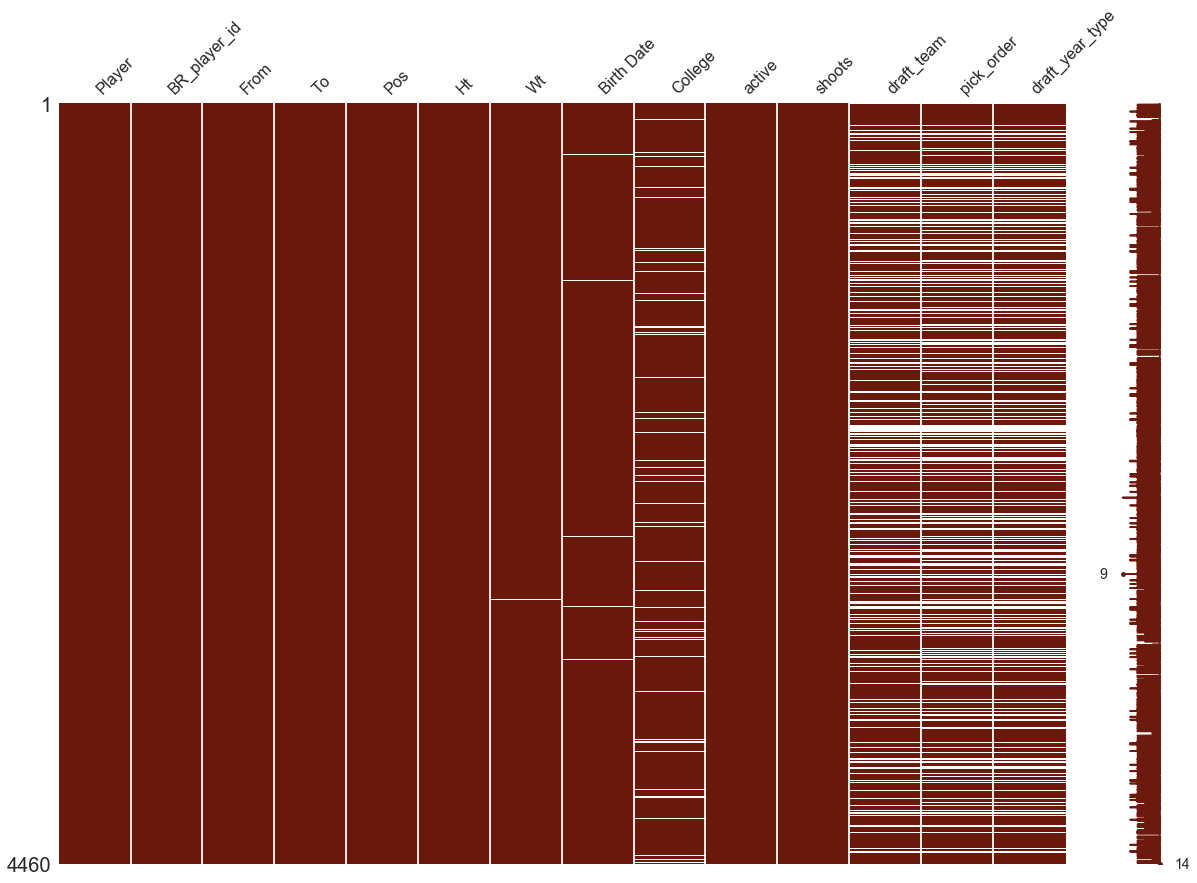

In [248]:
# let's see if there is any missing data
player_df_copy = player_df.replace("", np.NaN)
import missingno as msno

# Nullity or missing values by columns
msno.matrix(df=player_df_copy.iloc[:,:],figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [743]:
player_df

,Player,BR_player_id,From,To,Pos,Ht,Wt,Birth Date,College,active,shoots,draft_team,pick_order,draft_year_type
0,Alaa Abdelnaby,abdelal01,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University,0,Right,Portland Trail Blazers,"1st round (25th pick,25th overall)",1990 NBA Draft
1,Zaid Abdul-Aziz,abdulza01,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University,0,Right,Cincinnati Royals,"1st round (5th pick,5th overall)",1968 NBA Draft
2,Kareem Abdul-Jabbar*,abdulka01,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles",0,Right,Milwaukee Bucks,"1st round (1st pick,1st overall)",1969 NBA Draft
3,Mahmoud Abdul-Rauf,abdulma02,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University,0,Right,Denver Nuggets,"1st round (3rd pick,3rd overall)",1990 NBA Draft
4,Tariq Abdul-Wahad,abdulta01,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University,0,Right,Sacramento Kings,"1st round (11th pick,11th overall)",1997 NBA Draft
5,Shareef Abdur-Rahim,abdursh01,1997,2008,F,6-9,225,"December 11, 1976",University of California,0,Right,Vancouver Grizzlies,"1st round (3rd pick,3rd overall)",1996 NBA Draft
6,Tom Abernethy,abernto01,1977,1981,F,6-7,220,"May 6, 1954",Indiana University,0,Right,Los Angeles Lakers,"3rd round (9th pick,43rd overall)",1976 NBA Draft
7,Forest Able,ablefo01,1957,1957,G,6-3,180,"July 27, 1932",Western Kentucky University,0,Right,Syracuse Nationals,NaN,NaN
8,John Abramovic,abramjo01,1947,1948,F,6-3,195,"February 9, 1919",Salem International University,0,Right,NaN,NaN,NaN
9,Alex Abrines,abrinal01,2017,2017,G-F,6-6,190,"August 1, 1993",,1,Right,Oklahoma City Thunder,"2nd round (2nd pick,32nd overall)",2013 NBA Draft


In [874]:
def _get_the_soup(BR_player_id):
    url = "https://www.basketball-reference.com/players/"+BR_player_id[0]+"/"+BR_player_id+".html"
    html = urlopen(url)
    
    return BeautifulSoup(html,'lxml')

def _get_player_div_tags(BR_player_id):
    soup = _get_the_soup(BR_player_id)

    div_tags = [entry.get("id") for entry in soup.find_all('div') if entry.get("id") is not None]

    possible_tags = []
    for tag in div_tags:
        if re.match('all',tag):
            if re.search(r"\d",tag):
                continue
            if tag == "all_per_game":
                continue
            possible_tags.append(tag)
    
    return possible_tags

def create_player_df_per_game(BR_player_id):
    
    soup = _get_the_soup(BR_player_id)
    
    div_tag = "all_per_game"
    div_HTML = soup.find("div", {"id": div_tag})
    table_header = div_HTML.find('thead')
    table_body = div_HTML.find('tbody')
    col_headers = [info.getText().strip() for info in table_header.find_all('tr')]

    # returns a string for some reason, there must be a better way but this works
    col_headers = [val for val in col_headers[0].split()]
    df_all_per_game = pd.DataFrame(columns=col_headers)

    for i,row in enumerate(table_body.find_all('tr')):
        try:
            fill_vals = [row.find('th').text] + [val.text for val in row.find_all('td')]
        except AttributeError:
            fill_vals = [np.NaN]*len(col_headers)
        df_all_per_game.loc[i] = fill_vals 

    return df_all_per_game

def create_player_df_table(div_tag,BR_player_id):
    soup = _get_the_soup(BR_player_id)

    # parse via div_tags
    div_HTML = soup.find("div", {"id": div_tag})

    # sometimes data are in comments
    try:
        comments = div_HTML.findAll(text=lambda text:isinstance(text, Comment))
        div_soup = BeautifulSoup(comments[0],'lxml')
    except AttributeError:
        div_soup = div_HTML

    # to get table headers isolate thead
    table_header = div_soup.find('thead')
    table_body = div_soup.find('tbody')

    col_headers = [info.getText().strip() for info in table_header.find_all('tr')][0].split("\n")
    empty_header = [i for i, x in enumerate(col_headers) if x == "\xa0"] + [i for i, x in enumerate(col_headers) if x == ""]
    
    for index in empty_header[::-1]:
        del col_headers[index]

    df_all_totals = pd.DataFrame(columns=col_headers)
    for i,row in enumerate(table_body.find_all('tr')):
        fill_vals = [row.find('th').text] + [val.text for val in row.find_all('td')]

        if len(empty_header) > 0:
            for index in empty_header[::-1]:
                del fill_vals[index]

        df_all_totals.loc[i] = fill_vals 
    
    return df_all_totals

In [760]:
test = create_player_df_per_game('abdelal01')
test['BR_player_id'] = 'abdelal01'
test

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BR_player_id
0,1990-91,22,POR,NBA,PF,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,abdelal01
1,1991-92,23,POR,NBA,PF,71,1,13.2,2.5,5.1,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,abdelal01
2,1992-93,24,TOT,NBA,PF,75,52,17.5,3.3,6.3,...,1.7,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,abdelal01
3,1992-93,24,MIL,NBA,PF,12,0,13.3,2.2,4.7,...,1.0,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,abdelal01
4,1992-93,24,BOS,NBA,PF,63,52,18.3,3.5,6.6,...,1.8,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,abdelal01
5,1993-94,25,BOS,NBA,PF,13,0,12.2,1.8,4.2,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,abdelal01
6,1994-95,26,TOT,NBA,PF,54,0,9.4,2.2,4.3,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,abdelal01
7,1994-95,26,SAC,NBA,PF,51,0,9.3,2.3,4.3,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,abdelal01
8,1994-95,26,PHI,NBA,PF,3,0,10.0,0.3,3.7,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,abdelal01


In [709]:


# To-do: more advanced tables later.
possible_tags = ['all_totals','all_per_minute','all_per_poss','all_advanced']

#BR_player_id = 'acresma01'
df = create_player_df_per_game(BR_player_id)
# for tag in possible_tags:
#     print(tag)
#     df = create_player_df_table(str(tag),BR_player_id)
#     #print(df)

In [780]:
# for all per game players 

df_per_game_all = pd.DataFrame()

for player in player_df['BR_player_id'].unique():
    print(player)
    df_player = create_player_df_per_game(player)
    df_player['BR_player_id'] = player
    
    
    if len(df_per_game_all.columns) == 0:
        df_per_game_all.rename(columns = df_player.columns.values.tolist() + ['BR_player_id'])
        
    df_per_game_all = df_per_game_all.append(df_player)

# possible_tags = ['all_totals','all_per_minute','all_per_poss','all_advanced']

#     for tag in possible_tags:
#         print(tag)
#         df = create_player_df_table(str(tag),BR_player_id)
#         #print(df)

abdelal01
abdulza01
abdulka01
abdulma02
abdulta01
abdursh01
abernto01
ablefo01
abramjo01
abrinal01
ackeral01
ackerdo01
acresma01
actonbu01
acyqu01
adamsal01
adamsdo01
adamsge01
adamsha01
adamsjo01
adamsmi01
adamsst01
addisra01
adelmri01
adrieje01
afflaar01
agerma01
aguirma01
ahearbl01
aingeda01
aitchma01
ajincal01
akinhe01
akognjo01
alabiso01
alarima01
alcorga01
aldemfu01
aldrico01
aldrila01
aleksch01
alexacl01
alexaco01
alexaco02
alexaga01
alexajo01
alexavi01
alforst01
allenbi01
allenbo01
allenje01
allenla01
allenlu01
allenma01
allenra01
allenra02
allento01
allenwi01
allisod01
allrela01
allumda01
almonmo01
alstode01
alstora01
alumape01
amaecjo01
amayaas01
aminual01
amundlo01
anderbo01
anderch01
anderda03
anderal01
anderan01
anderan02
andercl01
anderda01
anderda02
anderde01
anderdw01
anderer01
andergr01
anderjj01
anderja01
anderje01
anderju01
anderke01
anderki01
anderky01
andermi01
anderni01
anderri01
anderro01
anderry01
andersh01
anderwi01
anderwa01
andrima01
anieldo01
anslemi01
anste

cunnija01
cunniwi01
curcira01
curear01
curetea01
curlebi01
currafr01
curryde01
curryed01
curryja01
currymi01
curryse01
curryst01
cvetkra01
dantomi01
dabicmi01
dahleed01
dailequ01
dalemsa01
dallmho01
dampier01
dampilo01
dandrbo01
daniean01
danieer01
daniell01
daniema01
danieme01
danietr01
danilsa01
dantlad01
darcepe01
dardeji01
dardeol01
dareyi01
darkje01
darneri01
darroji01
datomlu01
daughbr01
daughma01
davidko01
davidje01
daviebo01
daviebr01
davisan02
davisan01
davisau01
davisba01
davisbe01
davisbi01
davisbo01
davisbr01
davisbr02
davisch02
davisch01
davisda01
davisde01
davisdw01
davised01
davisem01
davisgl01
davisha01
davishu01
davisji01
davisjo01
davisjo02
davisle01
davisma01
davisma02
davisme01
davismi02
davismi01
davismi03
davismo01
davispa01
davisra01
davisre01
davisri01
davisro01
daviste01
daviswa01
daviswa03
daviswa02
daviswi01
dawkian01
dawkida01
dawkijo01
dawkipa01
dawsobr01
dawsoer01
dawsoji01
dawsoto01
dayto01
dayeau01
dayeda01
decolna01
deanegr01
deangbi01
debusda01
declean

hawthna01
hayesch01
hayesel01
hayesja01
hayesji01
hayesst01
haywago01
haywala01
haywobr01
haywosp01
hazenjo01
abdulma01
headlu01
healsh01
heanebr01
heardga01
heddehe01
heggsal01
heinsto01
hemridi01
hendeal01
hendece01
hendece02
hendeda01
hendege01
hendege02
hendejr01
hendeje01
hendeke01
hendeto01
hendrma01
hennela01
henrido01
henryal01
henrybi01
henryca01
henryco01
henrysk01
henryxa01
hensojo01
hensost01
hentzch01
hermabi01
hermskl01
hernaju01
hernawi01
herrech01
herreca01
herrmwa01
herroke01
hertzso01
hesteda01
hetzefr01
hewitbi01
hewsoja01
heymaar01
hezonma01
hibbero01
hickena01
hicksph01
hicksjj01
hieldbu01
higgibi01
higgico01
higgiea01
higgimi01
higgiro01
higgise01
higgske01
highjo01
hightwa01
hilarne01
hillar01
hillcl01
hillga01
hillge01
hillgr01
hilljo01
hillsi01
hillso01
hillst01
hillty01
hillhar01
hillida01
hillmda01
hiltofr01
hinriki01
hinsoro01
hirscme01
hitchle01
hitero01
hobsoda01
hodgedo01
hodgeju01
hodgecr01
hoefech01
hoffmpa01
hogsebo01
hoguedu01
hoibefr01
holcodo01
holc

marshdo02
marshdo01
marshke01
marshra01
marshto01
marshve01
martibi01
martibo01
martibr01
martica01
marticu01
martida01
martidi01
martido01
martife01
martija01
martije01
martike01
martike02
martila01
martima01
martiph01
martisl01
martiwh01
mashbja01
masinal01
masonan01
masonde01
masonro01
masseto01
masted01
mathijo01
matthwe01
matthwe02
maughar01
maxeyma01
maxieja01
maxwece01
maxweve01
maydo01
maysc01
mayse01
maybele01
mayescl01
mayesth01
mayfibi01
mayfike01
maynoer01
mayooj01
maystr01
mazzama01
mbahalu01
mcadobo01
mcadoja01
mcbrike01
mccalra01
mccanbo01
mccanbr01
mccanme01
mccanra01
mccarmi01
mccaran01
mccarwi01
mccarjo01
mccarho01
mccarke01
mccarwa01
mccasam01
mccawpa01
mccladw01
mcclate01
mcclida01
mccloja01
mccloge01
mccolcj01
mcconjo01
mcconbu01
mccontj01
mccorke01
mccorti01
mccoyje01
mccrapa01
mccrach01
mccraro01
mccrasc01
mcculch01
mcculjo01
mcdancl01
mcdanxa01
mcdanji01
mcdankj01
mcderdo01
mcdonbe01
mcdongl01
mcdonmi01
mcdonro01
mcdowha01
mcdyean01
mcelrji01
mcfarpa01
mcfariv01

rileybo01
rileyer01
rileypa01
rileyro01
rinalri01
riordmi01
risenar01
rittete01
rivasra01
riverau01
riverda01
riverdo01
robbile01
robbire01
roberan03
roberan02
roberri01
roberte01
roberan01
roberbi01
roberbr01
roberfr01
roberjo01
roberla01
roberma01
roberst01
roberal01
roberos01
roberry01
roberto01
robeyri01
robinbe01
robinch01
robincl01
robincl02
robinda01
robined01
robinfl01
robingl01
robingl02
robinja01
robinja03
robinja02
robinla01
robinna01
robinol01
robinro01
robinru01
robinsa01
robinth01
robintr01
robinwa01
robinwi01
robinbi01
robisda01
rochare01
rochejo01
rockge01
rockeja01
rodgegu01
rodmade01
rodrise01
roelo01
rogerca01
rogerha01
rogerjo01
rogerma01
rogerro01
rogerro02
rogerwi01
rogesal01
rohloke01
rollike01
rolliph01
rollitr01
romarlo01
rondora01
rookje01
rooksse01
rosede01
roseja01
rosema01
rosero01
rosenpe01
rosenle01
rosenha01
rosendi01
rossqu01
rosste01
rothdo01
rothsc01
rotheir01
rottnmi01
roundda01
rouxgi01
rowanro01
rowecu01
rowinji01
rowlade01
rowsobr01
roybr01
royald

warriha01
washbch01
washibo01
washida01
washido01
washidu01
washier01
washiji01
washike01
washipe01
washiri01
washist01
washitr01
washiwi01
watkida01
watsobo01
watsocj01
watsoea01
watsoja01
wattsro01
wattssa01
wattssl01
waynsma01
wearda01
weartr01
weathcl01
weathni01
weaveky01
webbje01
webbma01
webbsp01
webbech01
weberbr01
weberja01
webstel01
webstje01
webstma02
webstma01
wedmasc01
weemsso01
wehrdi01
weidnbr01
weissbo01
weitzri01
wellsbo01
wellsbu01
wellsow01
wellsra01
welpch01
welscji01
wennibi01
wenstma01
werdaro01
wertira01
wesleda01
weslewa01
westda01
westde01
westdo01
westje01
westma02
westma01
westro01
westbde01
westbru01
westppa01
wetzejo01
whalero01
whatlen01
wheatde01
wheelcl01
wheelty01
whitask01
whitedj01
whiteer01
whitehe01
whitehu01
whiteja01
whiteja02
whitejo01
whiteok01
whitera01
whitero02
whitero01
whitero03
whiteru01
whiteto01
whitewi01
whiteis01
whiteje01
whitedo01
whiteha01
whitfdw01
whitnch01
whitnha01
whitnha02
whittsh01
wickssi01
widbyro01
wiermu01
wiesebo01
wiggi

In [782]:
df_per_game_all.to_csv('all_players_per_game.csv')

In [886]:
possible_tags = ['all_per_poss']#,]'all_totals','all_advanced','all_per_minute',

for tag in possible_tags:
    df_all = pd.DataFrame()
    print(tag)
    for player in player_df['BR_player_id'].unique():
        print(player)
        try:
            df_player = create_player_df_table(str(tag),player)
        except AttributeError:
            continue
        df_player['BR_player_id'] = player
        

        if len(df_all.columns) == 0:
            df_all.rename(columns = df_player.columns.values.tolist() + ['BR_player_id'])
        

        df_all = df_all.append(df_player)
    df_all.to_csv(tag+'_all_players.csv')

all_per_poss
abdelal01
abdulza01
abdulka01
abdulma02
abdulta01
abdursh01
abernto01
ablefo01
abramjo01
abrinal01
ackeral01
ackerdo01
acresma01
actonbu01
acyqu01
adamsal01
adamsdo01
adamsge01
adamsha01
adamsjo01
adamsmi01
adamsst01
addisra01
adelmri01
adrieje01
afflaar01
agerma01
aguirma01
ahearbl01
aingeda01
aitchma01
ajincal01
akinhe01
akognjo01
alabiso01
alarima01
alcorga01
aldemfu01
aldrico01
aldrila01
aleksch01
alexacl01
alexaco01
alexaco02
alexaga01
alexajo01
alexavi01
alforst01
allenbi01
allenbo01
allenje01
allenla01
allenlu01
allenma01
allenra01
allenra02
allento01
allenwi01
allisod01
allrela01
allumda01
almonmo01
alstode01
alstora01
alumape01
amaecjo01
amayaas01
aminual01
amundlo01
anderbo01
anderch01
anderda03
anderal01
anderan01
anderan02
andercl01
anderda01
anderda02
anderde01
anderdw01
anderer01
andergr01
anderjj01
anderja01
anderje01
anderju01
anderke01
anderki01
anderky01
andermi01
anderni01
anderri01
anderro01
anderry01
andersh01
anderwi01
anderwa01
andrima01
anieldo01
an

cunnida01
cunnidi01
cunnija01
cunniwi01
curcira01
curear01
curetea01
curlebi01
currafr01
curryde01
curryed01
curryja01
currymi01
curryse01
curryst01
cvetkra01
dantomi01
dabicmi01
dahleed01
dailequ01
dalemsa01
dallmho01
dampier01
dampilo01
dandrbo01
daniean01
danieer01
daniell01
daniema01
danieme01
danietr01
danilsa01
dantlad01
darcepe01
dardeji01
dardeol01
dareyi01
darkje01
darneri01
darroji01
datomlu01
daughbr01
daughma01
davidko01
davidje01
daviebo01
daviebr01
davisan02
davisan01
davisau01
davisba01
davisbe01
davisbi01
davisbo01
davisbr01
davisbr02
davisch02
davisch01
davisda01
davisde01
davisdw01
davised01
davisem01
davisgl01
davisha01
davishu01
davisji01
davisjo01
davisjo02
davisle01
davisma01
davisma02
davisme01
davismi02
davismi01
davismi03
davismo01
davispa01
davisra01
davisre01
davisri01
davisro01
daviste01
daviswa01
daviswa03
daviswa02
daviswi01
dawkian01
dawkida01
dawkijo01
dawkipa01
dawsobr01
dawsoer01
dawsoji01
dawsoto01
dayto01
dayeau01
dayeda01
decolna01
deanegr01
deangbi

hawkiro01
hawkito01
hawthna01
hayesch01
hayesel01
hayesja01
hayesji01
hayesst01
haywago01
haywala01
haywobr01
haywosp01
hazenjo01
abdulma01
headlu01
healsh01
heanebr01
heardga01
heddehe01
heggsal01
heinsto01
hemridi01
hendeal01
hendece01
hendece02
hendeda01
hendege01
hendege02
hendejr01
hendeje01
hendeke01
hendeto01
hendrma01
hennela01
henrido01
henryal01
henrybi01
henryca01
henryco01
henrysk01
henryxa01
hensojo01
hensost01
hentzch01
hermabi01
hermskl01
hernaju01
hernawi01
herrech01
herreca01
herrmwa01
herroke01
hertzso01
hesteda01
hetzefr01
hewitbi01
hewsoja01
heymaar01
hezonma01
hibbero01
hickena01
hicksph01
hicksjj01
hieldbu01
higgibi01
higgico01
higgiea01
higgimi01
higgiro01
higgise01
higgske01
highjo01
hightwa01
hilarne01
hillar01
hillcl01
hillga01
hillge01
hillgr01
hilljo01
hillsi01
hillso01
hillst01
hillty01
hillhar01
hillida01
hillmda01
hiltofr01
hinriki01
hinsoro01
hirscme01
hitchle01
hitero01
hobsoda01
hodgedo01
hodgeju01
hodgecr01
hoefech01
hoffmpa01
hogsebo01
hoguedu01
hoib

marshji01
marshri01
marshdo02
marshdo01
marshke01
marshra01
marshto01
marshve01
martibi01
martibo01
martibr01
martica01
marticu01
martida01
martidi01
martido01
martife01
martija01
martije01
martike01
martike02
martila01
martima01
martiph01
martisl01
martiwh01
mashbja01
masinal01
masonan01
masonde01
masonro01
masseto01
masted01
mathijo01
matthwe01
matthwe02
maughar01
maxeyma01
maxieja01
maxwece01
maxweve01
maydo01
maysc01
mayse01
maybele01
mayescl01
mayesth01
mayfibi01
mayfike01
maynoer01
mayooj01
maystr01
mazzama01
mbahalu01
mcadobo01
mcadoja01
mcbrike01
mccalra01
mccanbo01
mccanbr01
mccanme01
mccanra01
mccarmi01
mccaran01
mccarwi01
mccarjo01
mccarho01
mccarke01
mccarwa01
mccasam01
mccawpa01
mccladw01
mcclate01
mcclida01
mccloja01
mccloge01
mccolcj01
mcconjo01
mcconbu01
mccontj01
mccorke01
mccorti01
mccoyje01
mccrapa01
mccrach01
mccraro01
mccrasc01
mcculch01
mcculjo01
mcdancl01
mcdanxa01
mcdanji01
mcdankj01
mcderdo01
mcdonbe01
mcdongl01
mcdonmi01
mcdonro01
mcdowha01
mcdyean01
mcelrji01

rigauan01
rikerto01
rileybo01
rileyer01
rileypa01
rileyro01
rinalri01
riordmi01
risenar01
rittete01
rivasra01
riverau01
riverda01
riverdo01
robbile01
robbire01
roberan03
roberan02
roberri01
roberte01
roberan01
roberbi01
roberbr01
roberfr01
roberjo01
roberla01
roberma01
roberst01
roberal01
roberos01
roberry01
roberto01
robeyri01
robinbe01
robinch01
robincl01
robincl02
robinda01
robined01
robinfl01
robingl01
robingl02
robinja01
robinja03
robinja02
robinla01
robinna01
robinol01
robinro01
robinru01
robinsa01
robinth01
robintr01
robinwa01
robinwi01
robinbi01
robisda01
rochare01
rochejo01
rockge01
rockeja01
rodgegu01
rodmade01
rodrise01
roelo01
rogerca01
rogerha01
rogerjo01
rogerma01
rogerro01
rogerro02
rogerwi01
rogesal01
rohloke01
rollike01
rolliph01
rollitr01
romarlo01
rondora01
rookje01
rooksse01
rosede01
roseja01
rosema01
rosero01
rosenpe01
rosenle01
rosenha01
rosendi01
rossqu01
rosste01
rothdo01
rothsc01
rotheir01
rottnmi01
roundda01
rouxgi01
rowanro01
rowecu01
rowinji01
rowlade01
rows

warrewi01
warribr01
warriha01
washbch01
washibo01
washida01
washido01
washidu01
washier01
washiji01
washike01
washipe01
washiri01
washist01
washitr01
washiwi01
watkida01
watsobo01
watsocj01
watsoea01
watsoja01
wattsro01
wattssa01
wattssl01
waynsma01
wearda01
weartr01
weathcl01
weathni01
weaveky01
webbje01
webbma01
webbsp01
webbech01
weberbr01
weberja01
webstel01
webstje01
webstma02
webstma01
wedmasc01
weemsso01
wehrdi01
weidnbr01
weissbo01
weitzri01
wellsbo01
wellsbu01
wellsow01
wellsra01
welpch01
welscji01
wennibi01
wenstma01
werdaro01
wertira01
wesleda01
weslewa01
westda01
westde01
westdo01
westje01
westma02
westma01
westro01
westbde01
westbru01
westppa01
wetzejo01
whalero01
whatlen01
wheatde01
wheelcl01
wheelty01
whitask01
whitedj01
whiteer01
whitehe01
whitehu01
whiteja01
whiteja02
whitejo01
whiteok01
whitera01
whitero02
whitero01
whitero03
whiteru01
whiteto01
whitewi01
whiteis01
whiteje01
whitedo01
whiteha01
whitfdw01
whitnch01
whitnha01
whitnha02
whittsh01
wickssi01
widbyro01
wier

In [806]:
#df_per_game_all.to_csv('all_players_per_game.csv')
soup = _get_the_soup('abernto01')
div_HTML = soup.find("div", {"id": 'all_per_poss'})

# sometimes data are in comments
try:
    comments = div_HTML.findAll(text=lambda text:isinstance(text, Comment))
    div_soup = BeautifulSoup(comments[0],'lxml')
except AttributeError:
    div_soup = div_HTML
#if BR_player_id == 'abernto01':
#    print(div_soup)

# to get table headers isolate thead
table_header = div_soup.find('thead')

table_body = div_soup.find('tbody')

In [830]:
test = ['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', '\xa0', 'DWS', 'WS', 'WS/48', '\xa0', 'OBPM', 'DBPM', 'BPM', 'VORP', 'BR_player_id']

In [834]:
indices = [i for i, x in enumerate(test) if x == "\xdfa0"]


In [860]:
[21,45][::-1]

[45, 21]

In [877]:
df_all

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,BR_player_id,...,ORB,PF,PTS,Pos,STL,Season,TOV,TRB,Tm,eFG%
0,55,.474,116,0,,0,12,22,12,abdelal01,...,27,39,135,PF,4,1990-91,22,89,POR,.474
1,178,.493,361,0,,0,30,23,16,abdelal01,...,81,132,432,PF,25,1991-92,66,260,POR,.493
2,245,.519,472,0,.000,1,27,24,26,abdelal01,...,126,189,578,PF,25,1992-93,97,337,TOT,.518
3,26,.473,55,0,.000,1,10,24,4,abdelal01,...,12,24,64,PF,6,1992-93,13,37,MIL,.464
4,219,.525,417,0,,0,17,24,22,abdelal01,...,114,165,514,PF,19,1992-93,84,300,BOS,.525
5,24,.436,55,0,,0,3,25,3,abdelal01,...,12,20,64,PF,2,1993-94,17,46,BOS,.436
6,118,.515,229,0,.000,2,13,26,12,abdelal01,...,37,104,256,PF,15,1994-95,45,114,TOT,.511
7,117,.537,218,0,.000,2,13,26,12,abdelal01,...,34,102,254,PF,15,1994-95,40,106,SAC,.532
8,1,.091,11,0,,0,0,26,0,abdelal01,...,3,2,2,PF,0,1994-95,5,8,PHI,.091
0,NaN,NaN,NaN,NaN,NaN,NaN,37,22,,abdulza01,...,,115,358,C,,1968-69,,409,TOT,NaN


In [ ]:
4